<a href="https://colab.research.google.com/github/Deekshit1325/email-spam-detector/blob/main/Email_Spam_Detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS, WordCloud

# TensorFlow/Keras imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score, roc_curve


In [ ]:
import pandas as pd

# Use raw URLs from GitHub (replace with correct ones if needed)
emails_url = 'https://raw.githubusercontent.com/Deekshit1325/email-spam-detector/main/emails.csv'
processed_url = 'https://raw.githubusercontent.com/Deekshit1325/email-spam-detector/main/processed.csv'
processed_file_url = 'https://raw.githubusercontent.com/Deekshit1325/email-spam-detector/main/processed_file.csv'

emails_df = pd.read_csv(emails_url, encoding='latin1')
processed_df = pd.read_csv(processed_url)
processed_file_df = pd.read_csv(processed_file_url)

print(emails_df.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [ ]:
print(emails_df.info())
print(processed_df.shape)
print(processed_file_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
(5728, 4)
Index(['text', 'spam', 'length', 'clean_text'], dtype='object')


In [ ]:
# Data cleaning class to handle text processing
class data_cleaning(object):
    def __init__(self):
        pass

    def message_cleaning(self, message):
        # Remove punctuation
        Test_punc_removed = [char for char in message if char not in string.punctuation]
        Test_punc_removed_join = ''.join(Test_punc_removed)
        Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
        final_join = ' '.join(Test_punc_removed_join_clean)
        return final_join

    def apply_to_column(self, data_column_text):
        data_processed = data_column_text.apply(self.message_cleaning)
        return data_processed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


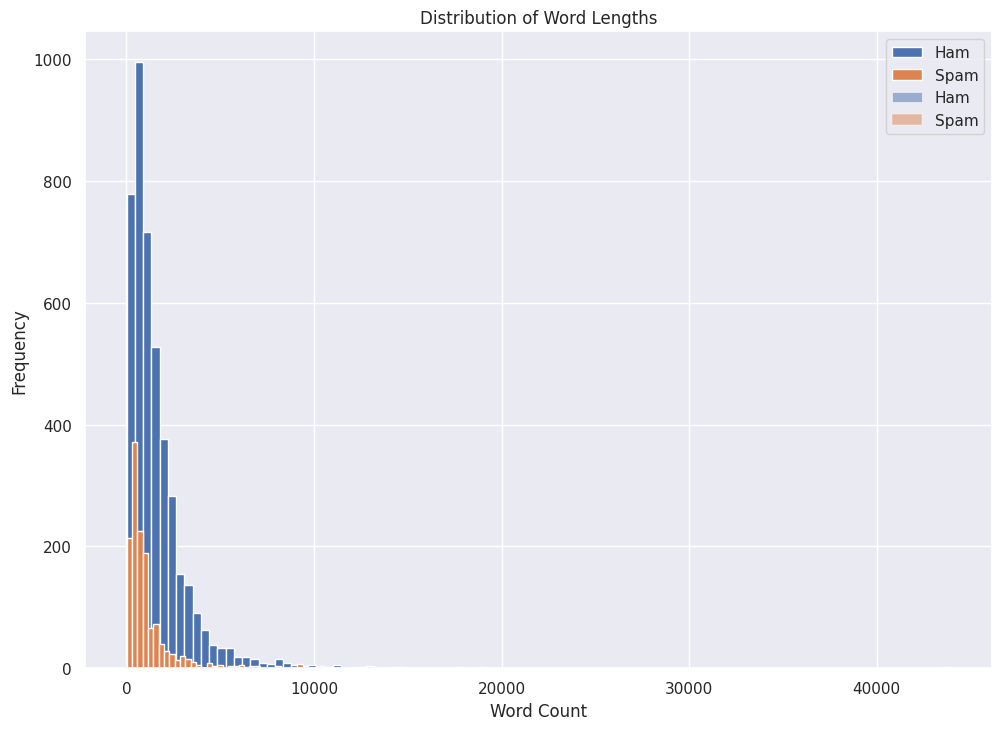

In [ ]:
# Plotting the distribution of email lengths in ham vs spam
sns.set(rc={'figure.figsize':(11.7,8.27)})

ham_messages_length = processed_df[processed_df['spam'] == 0]
spam_messages_length = processed_df[processed_df['spam'] == 1]

ham_messages_length['length'].plot(bins=100, kind='hist', label='Ham')
spam_messages_length['length'].plot(bins=100, kind='hist', label='Spam')

plt.title('Distribution of Length of Email Text')
plt.xlabel('Length of Email Text')
plt.legend()

# Plotting word counts in ham vs spam emails
import nltk
nltk.download('punkt')

ham_words_length = [len(title.split()) for title in processed_df[processed_df['spam'] == 0].text.values]
spam_words_length = [len(title.split()) for title in processed_df[processed_df['spam'] == 1].text.values]

ax = sns.histplot(ham_words_length, stat='density', bins=30, label='Ham', kde=True)
ax = sns.histplot(spam_words_length, stat='density', bins=30, label='Spam', kde=True)

plt.title('Distribution of Word Lengths')
plt.xlabel('Word Count')
plt.legend()
plt.show()


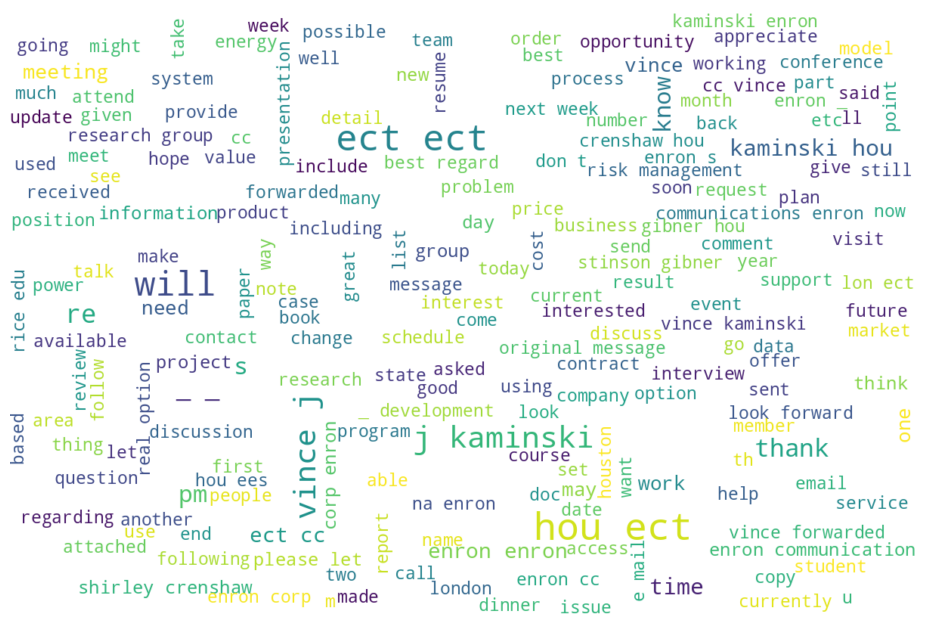

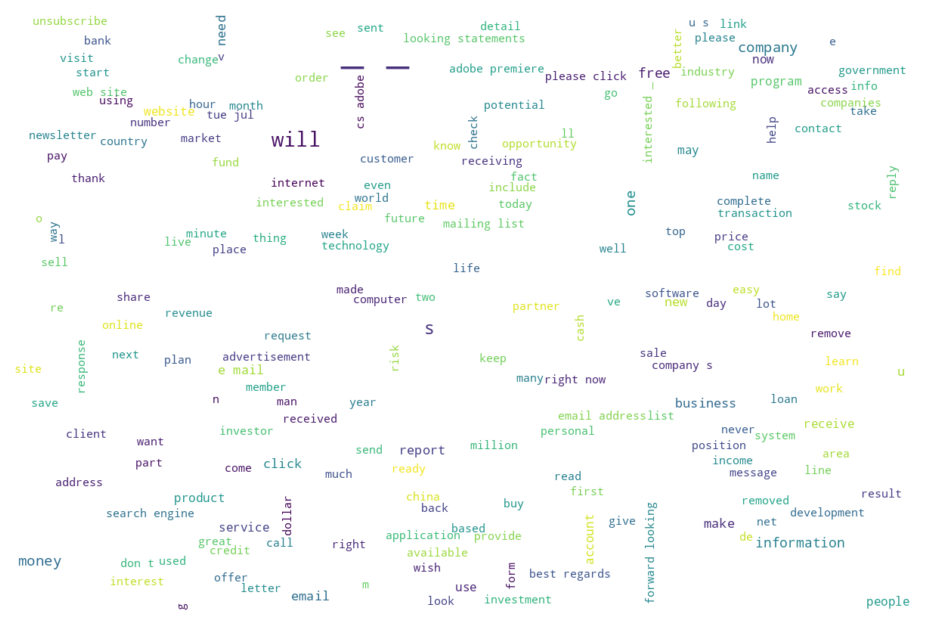

In [ ]:
# Generate Word Cloud for Ham and Spam emails

# Create an instance of generate_word_cloud class
word_cloud_obj = generate_word_cloud()

# Word cloud for Ham emails
word_cloud_obj.word_cloud(processed_df[processed_df['spam'] == 0]['text'], 'ham_word_cloud.png')

# Word cloud for Spam emails
word_cloud_obj.word_cloud(processed_df[processed_df['spam'] == 1]['text'], 'spam_word_cloud.png')


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()  # tokenize
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

processed_df['clean_text'] = processed_df['text'].apply(clean_text)
processed_df.head()




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,spam,length,clean_text
0,Subject: naturally irresistible your corporate...,1,1484,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,235,subject money get software cds software compat...


In [ ]:

# Import necessary libraries for wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define the class generate_word_cloud
class generate_word_cloud:
    def __init__(self):
        pass

    # Function to generate word cloud for a given data column
    def word_cloud(self, data_frame_column, output_image_file):
        text = " ".join(review for review in data_frame_column)
        stopwords = set(STOPWORDS)
        stopwords.update(["subject"])
        wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, max_font_size=50, margin=0, background_color="white").generate(text)

        # Plot and save the word cloud image
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        wordcloud.to_file(output_image_file)



In [ ]:
class apply_embedding_and_model:
    def __init__(self):
        self.vocab_size = 10000
        self.max_length = 100
        self.embedding_dim = 16
        self.tokenizer = Tokenizer(num_words=self.vocab_size, oov_token="<OOV>")

    def prepare_data(self, text_column, labels):
        self.tokenizer.fit_on_texts(text_column)
        sequences = self.tokenizer.texts_to_sequences(text_column)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding='post', truncating='post')
        return train_test_split(padded, labels, test_size=0.2, random_state=42)

    def build_model(self):
        model = Sequential([
            Embedding(self.vocab_size, self.embedding_dim, input_length=self.max_length),
            GlobalAveragePooling1D(),
            Dense(24, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=10):
        model = self.build_model()
        model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=2)
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        ConfusionMatrixDisplay.from_predictions(
            y_test, y_pred, display_labels=['Ham', 'Spam'], cmap=plt.cm.Blues
        )
        plt.title('Confusion Matrix')
        plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 - 2s - 17ms/step - accuracy: 0.7724 - loss: 0.5028 - val_accuracy: 0.8665 - val_loss: 0.3159
Epoch 2/10
144/144 - 1s - 7ms/step - accuracy: 0.9426 - loss: 0.2035 - val_accuracy: 0.9738 - val_loss: 0.1369
Epoch 3/10
144/144 - 1s - 6ms/step - accuracy: 0.9836 - loss: 0.0962 - val_accuracy: 0.9852 - val_loss: 0.0815
Epoch 4/10
144/144 - 1s - 5ms/step - accuracy: 0.9882 - loss: 0.0551 - val_accuracy: 0.9860 - val_loss: 0.0643
Epoch 5/10
144/144 - 1s - 4ms/step - accuracy: 0.9959 - loss: 0.0339 - val_accuracy: 0.9904 - val_loss: 0.0487
Epoch 6/10
144/144 - 1s - 5ms/step - accuracy: 0.9965 - loss: 0.0237 - val_accuracy: 0.9913 - val_loss: 0.0407
Epoch 7/10
144/144 - 1s - 4ms/step - accuracy: 0.9954 - loss: 0.0199 - val_accuracy: 0.9869 - val_loss: 0.0398
Epoch 8/10
144/144 - 1s - 4ms/step - accuracy: 0.9972 - loss: 0.0155 - val_accuracy: 0.9904 - val_loss: 0.0366
Epoch 9/10
144/144 - 1s - 4ms/step - accuracy: 0.9976 - loss: 0.0119 - val_accuracy: 0.9860 - val_loss: 0.0369
Epoch 10/10

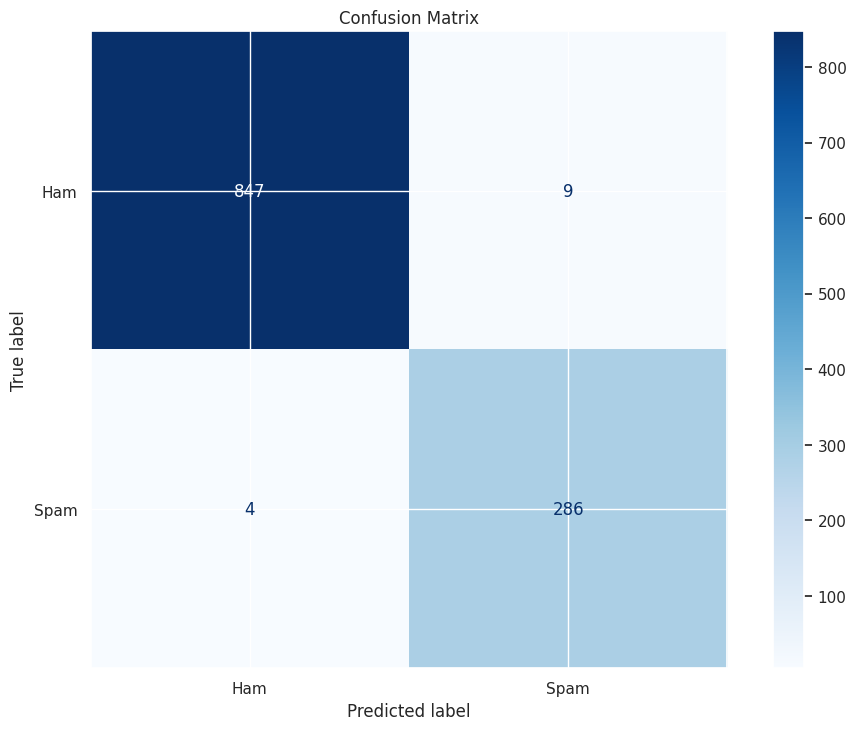

In [ ]:
embedding_model = apply_embedding_and_model()

X_train, X_test, y_train, y_test = embedding_model.prepare_data(processed_df['clean_text'], processed_df['spam'].values)

embedding_model.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class apply_embedding_and_model:
    def __init__(self):
        self.vocab_size = 10000
        self.max_length = 100
        self.embedding_dim = 16
        self.tokenizer = Tokenizer(num_words=self.vocab_size, oov_token="<OOV>")

    def prepare_data(self, text_column, labels):
        self.tokenizer.fit_on_texts(text_column)
        sequences = self.tokenizer.texts_to_sequences(text_column)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding='post', truncating='post')
        return train_test_split(padded, labels, test_size=0.3, random_state=42)

    def build_model(self):
        model = Sequential([
            Embedding(self.vocab_size, self.embedding_dim, input_length=self.max_length),
            GlobalAveragePooling1D(),
            Dense(24, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def _train_and_evaluate(self, X, y, model_name='Neural Network', epochs=10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = self.build_model()
        model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        print(f'{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')
        print(f'{model_name} Classification Report:\n{classification_report(y_test, y_pred)}')

        ConfusionMatrixDisplay.from_predictions(
            y_test, y_pred, display_labels=['Ham', 'Spam'], cmap=plt.cm.Blues
        )
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

        return accuracy_score(y_test, y_pred), y_pred



In [ ]:

    def apply_neural_net(self, text_column, labels, epochs=10):
        X_train, X_test, y_train, y_test = self.prepare_data(text_column, labels)
        return self._train_and_evaluate(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]), epochs=epochs)




In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

class apply_embedding_and_model:
    def __init__(self):
        self.vocab_size = 10000
        self.max_length = 100
        self.embedding_dim = 16
        self.tokenizer = Tokenizer(num_words=self.vocab_size, oov_token="<OOV>")

    def prepare_data(self, text_column, labels):
        self.tokenizer.fit_on_texts(text_column)
        sequences = self.tokenizer.texts_to_sequences(text_column)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding='post', truncating='post')
        return train_test_split(padded, labels, test_size=0.3, random_state=42)

    def build_model(self):
        model = Sequential([
            Embedding(self.vocab_size, self.embedding_dim, input_length=self.max_length),
            GlobalAveragePooling1D(),
            Dense(24, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
        return model

    def train_and_evaluate(self, text_column, labels, epochs=10):
        X_train, X_test, y_train, y_test = self.prepare_data(text_column, labels)
        model = self.build_model()
        model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        ConfusionMatrixDisplay.from_predictions(
            y_test, y_pred, display_labels=['Ham', 'Spam'], cmap=plt.cm.Blues
        )
        plt.title('Confusion Matrix')
        plt.show()


In [ ]:
# Save processed data to CSV
processed_df.to_csv('processed_file_final.csv', encoding='utf-8', index=False)

# Confirm file saved
print("Processed file has been saved as 'processed_file_final.csv'")


Processed file has been saved as 'processed_file_final.csv'


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


126/126 - 2s - 16ms/step - accuracy: 0.7750 - loss: 0.5335 - val_accuracy: 0.7824 - val_loss: 0.3659
Epoch 2/10
126/126 - 1s - 8ms/step - accuracy: 0.9307 - loss: 0.2282 - val_accuracy: 0.9709 - val_loss: 0.1620
Epoch 3/10
126/126 - 1s - 7ms/step - accuracy: 0.9820 - loss: 0.1089 - val_accuracy: 0.9820 - val_loss: 0.0967
Epoch 4/10
126/126 - 1s - 11ms/step - accuracy: 0.9915 - loss: 0.0636 - val_accuracy: 0.9878 - val_loss: 0.0696
Epoch 5/10
126/126 - 1s - 4ms/step - accuracy: 0.9935 - loss: 0.0426 - val_accuracy: 0.9791 - val_loss: 0.0606
Epoch 6/10
126/126 - 1s - 5ms/step - accuracy: 0.9973 - loss: 0.0284 - val_accuracy: 0.9889 - val_loss: 0.0475
Epoch 7/10
126/126 - 1s - 5ms/step - accuracy: 0.9970 - loss: 0.0222 - val_accuracy: 0.9895 - val_loss: 0.0432
Epoch 8/10
126/126 - 1s - 4ms/step - accuracy: 0.9958 - loss: 0.0188 - val_accuracy: 0.9907 - val_loss: 0.0396
Epoch 9/10
126/126 - 1s - 5ms/step - accuracy: 0.9978 - loss: 0.0142 - val_accuracy: 0.9872 - val_loss: 0.0418
Epoch 10/1

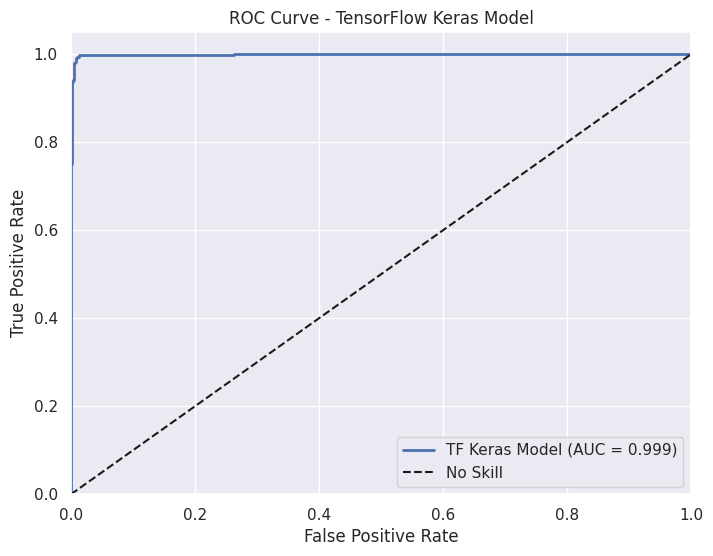

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam

# Assuming processed_df['clean_text'] and processed_df['spam'] are your text data and labels

# Parameters
vocab_size = 10000
max_length = 100
embedding_dim = 16

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(processed_df['clean_text'])
sequences = tokenizer.texts_to_sequences(processed_df['clean_text'])
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

X = padded
y = processed_df['spam'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')  # Output probability
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

# Predict probabilities
y_scores = model.predict(X_test).flatten()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'TF Keras Model (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TensorFlow Keras Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()






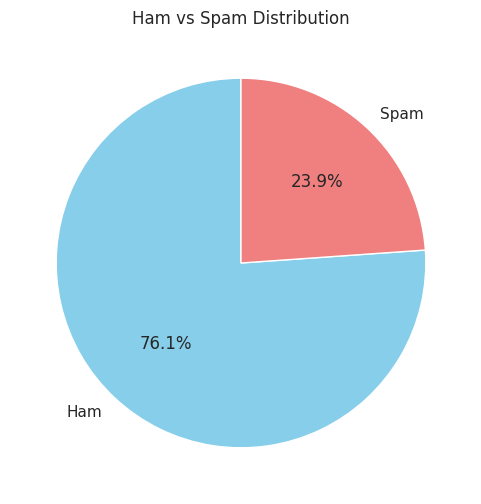

In [ ]:
import matplotlib.pyplot as plt

labels = ['Ham', 'Spam']
sizes = processed_df['spam'].value_counts().sort_index()  # Make sure order matches labels (0:Ham,1:Spam)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Ham vs Spam Distribution')
plt.show()


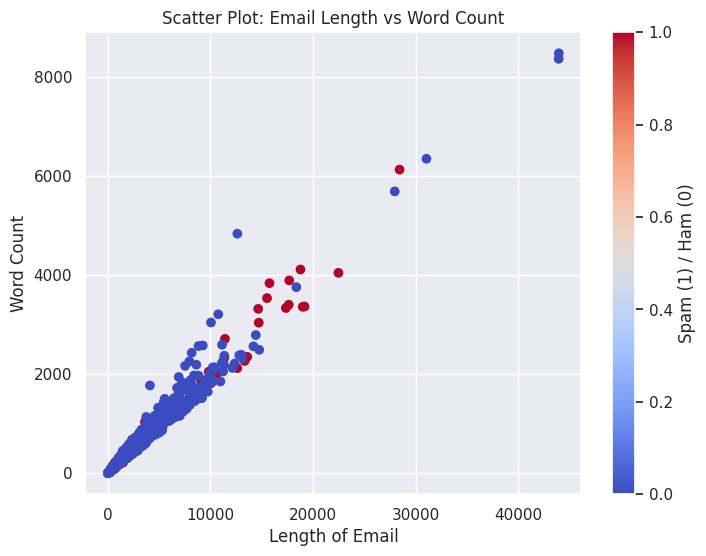

In [ ]:
import matplotlib.pyplot as plt

emails_df['length'] = emails_df['text'].apply(len)
emails_df['word_count'] = emails_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
plt.scatter(emails_df['length'], emails_df['word_count'], c=emails_df['spam'], cmap='coolwarm')
plt.xlabel('Length of Email')
plt.ylabel('Word Count')
plt.title('Scatter Plot: Email Length vs Word Count')
plt.colorbar(label='Spam (1) / Ham (0)')
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


126/126 - 1s - 8ms/step - accuracy: 0.5480 - loss: 728.8349 - val_accuracy: 0.6038 - val_loss: 564.7949
Epoch 2/10
126/126 - 1s - 4ms/step - accuracy: 0.6204 - loss: 480.1149 - val_accuracy: 0.6161 - val_loss: 444.6788
Epoch 3/10
126/126 - 1s - 5ms/step - accuracy: 0.6361 - loss: 367.3484 - val_accuracy: 0.6294 - val_loss: 339.0984
Epoch 4/10
126/126 - 1s - 5ms/step - accuracy: 0.6383 - loss: 265.4594 - val_accuracy: 0.6463 - val_loss: 245.5859
Epoch 5/10
126/126 - 0s - 3ms/step - accuracy: 0.6548 - loss: 176.6806 - val_accuracy: 0.6475 - val_loss: 157.0487
Epoch 6/10
126/126 - 1s - 5ms/step - accuracy: 0.6658 - loss: 102.1365 - val_accuracy: 0.6608 - val_loss: 81.0754
Epoch 7/10
126/126 - 0s - 3ms/step - accuracy: 0.6643 - loss: 44.3627 - val_accuracy: 0.6591 - val_loss: 22.9123
Epoch 8/10
126/126 - 1s - 4ms/step - accuracy: 0.6638 - loss: 11.2761 - val_accuracy: 0.6818 - val_loss: 10.8001
Epoch 9/10
126/126 - 1s - 5ms/step - accuracy: 0.6600 - loss: 9.8851 - val_accuracy: 0.6661 - va

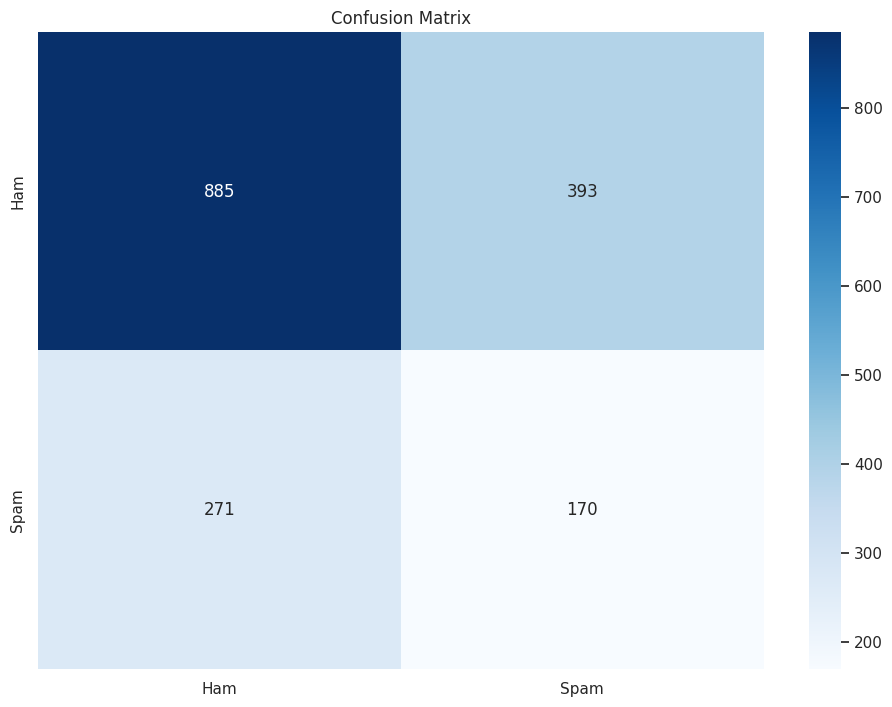

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1278
           1       0.30      0.39      0.34       441

    accuracy                           0.61      1719
   macro avg       0.53      0.54      0.53      1719
weighted avg       0.65      0.61      0.63      1719



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assume X_train, X_test, y_train, y_test are ready NumPy arrays (or convert if needed)

# Build a simple linear model similar to linear SVM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')  # Linear activation for SVM-like behavior
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Predict logits and convert to class labels (0 or 1)
logits = model.predict(X_test)
y_pred = (logits > 0).astype(int).flatten()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))




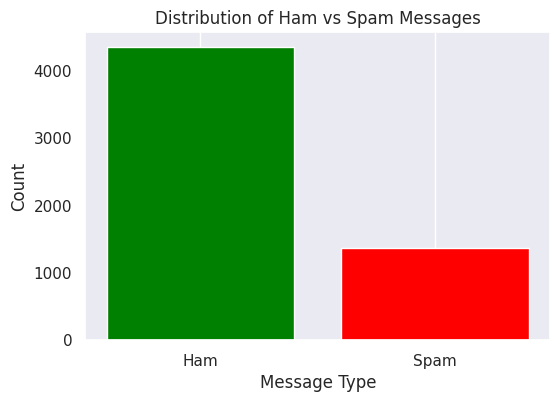

In [ ]:
import matplotlib.pyplot as plt

# Count spam and ham messages
label_counts = processed_df['spam'].value_counts()  # 1 = spam, 0 = ham

# Plot bar graph
plt.figure(figsize=(6, 4))
plt.bar(['Ham', 'Spam'], label_counts, color=['green', 'red'])
plt.title('Distribution of Ham vs Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()
